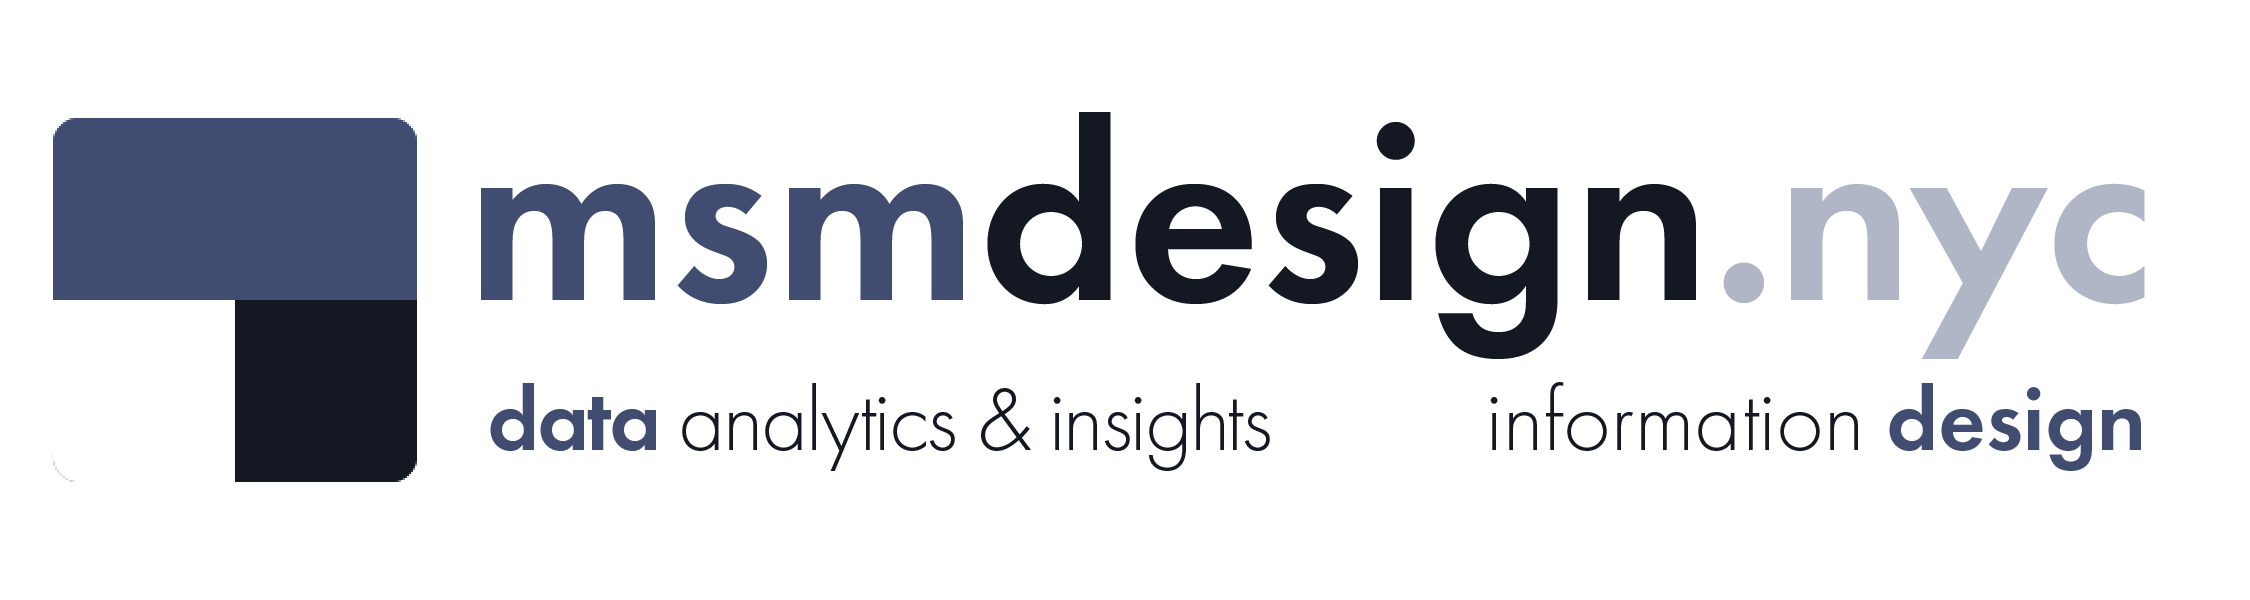

# Exploratory Data Analysis with Python Cookbook

**Compiled by David White <david@msmdesign.nyc>**

**Documentation:**  
- **[NumPy](https://numpy.org/doc/stable/ "NumPy Documentation")**  
- **[pandas](https://pandas.pydata.org/docs/ "pandas Documentation")**  
- **[Matplotlib](https://matplotlib.org/stable/api/index.html "Matplotlib Documentation")**  
- **[Seaborn](https://seaborn.pydata.org/api.html "Seaborn Documentation")**  

***

## 0. Setup the Workspace

### Import Numpy, pandas, Matplotlib, and Seaborn

In [2]:
# import the libraries typically needed for data analysis and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load CSV from GitHub

In [3]:
# load the data from the csv file (hosted on Github) and assign it to a variable

df = pd.read_csv('https://raw.githubusercontent.com/davidwhitemsm/selected-open-datasources/master/titanic.csv', 
                   encoding='utf-8')

### Load CSV from Local Machine

In [3]:
# read from local csv file

# df_csv = pd.read_csv(r'C:\Users\david\Documents\titanic.csv', encoding='utf-8')

### Load Excel from local Machine

In [4]:
# read from local Excel file

# df_xlsx = pd.read_excel(r'C:\Users\david\Documents\titanic.xlsx', sheet_name='titanic') # or sheet_name=0

# in both examples, note the "r" immediately before the file path. this prevents the unicode escape error

### Load Query Results from Google BigQuery

In [5]:
# conda install -c conda-forge pandas-gbq

# import pandas_gbq

# TODO: Set project_id to your Google Cloud Platform project ID. 
# project_id = "my-project"

# sql = """ 
# SELECT *
# FROM `bigquery-public-data.utility_us.country_code_iso`  
# """ 
# df_gbq = pandas_gbq.read_gbq(sql, project_id=project_id)

### Load JSON from NYC Open Data using  Socrata API

In [4]:
# import the library needed to load json data from the Socrata api

from sodapy import Socrata

In [5]:
# load the json data and store it in a variable

client = Socrata("data.cityofnewyork.us", None)

# First 2000 results, returned as JSON from API / converted to Python list of dictionaries by sodapy.

# on nyc open data page click on "API Docs", scroll to bottom of page, copy code snippet for "Python Pandas"

# the "9b9u-8989" key is unique to this particular data set

results = client.get("9b9u-8989", limit=2000)

# Convert to pandas DataFrame
df_socrata = pd.DataFrame.from_records(results)

***

## 1. Glimpse the Dataset's Contents

### Print the first (n) rows of the DataFrame

In [8]:
# confirm that the data has loaded correctly by displaying the first few rows of the DataFrame

# the default is 5 rows

df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


### Print the last (n) rows of the DataFrame

In [9]:
# confirm that the data has loaded correctly by displaying the last few rows of the DataFrame

# the default is 5 rows

df.tail()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.00
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.00
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.45
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.00
886,0,3,Mr. Patrick Dooley,male,32.0,0,0,7.75


***

## 2. Determine the Size, Shape and Characteristics of the Dataset

### Find the Number of Rows and Columns in the DataFrame

In [21]:
# how many rows and how many columns are contained in our dataframe?

df.shape

(887, 8)

### Find the Index of the DataFrame

In [22]:
# what is the index (list of row labels) for our dataframe?

df.index

RangeIndex(start=0, stop=887, step=1)

### Display the DataFrame's Column Names

In [12]:
# what are the columns of our dataset?

df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

### Display the number of null values for each column

In [14]:
df_socrata.isnull().sum()

establishment_record_dba                          0
establishment_record_establishment_street         0
establishment_record_establishment_zip            0
establishment_record_establishment_borough        0
establishment_record_business_sector           1204
establishment_record_establishment_category    1088
establishment_record_actual_opening_date        182
number_of_employees                             209
establishment_record_type_of_cuisine           1275
dtype: int64

### Display a Description of Each Column

In [13]:
# what type of data is being stored in each column of our DataFrame?
# which columns (if any) are missing data?

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


***

## 3. Change the Data Type of a Column

### Cast Series to Numeric Data Type

In [6]:
# let's adjust the data types of our columns so we can better analyze the data

df_socrata['number_of_employees'] = pd.to_numeric(df_socrata['number_of_employees'], errors='coerce')

### Cast Series to Categorical Data Type

In [8]:
df_socrata['establishment_record_establishment_category'] =\
df_socrata['establishment_record_establishment_category'].astype('category')

### Cast Series to Datetime Data Type

In [9]:
df_socrata['establishment_record_actual_opening_date'] = pd.to_datetime\
(df_socrata['establishment_record_actual_opening_date'], errors='coerce')

### Cast Series to Boolean Data Type

In [10]:
df['Survived'] = df['Survived'].astype('bool')

### Cast Series to String Data Type

In [11]:
df['Pclass'] = df['Pclass'].astype('string')

### Cast Series to Object Data Type

In [13]:
df['Pclass'] = df['Pclass'].astype('object')

***

## 4. Subset Data

### Select Data by Label

In [ ]:
# .loc

# select the columns (all rows) we want to explore further and store them in a variable

df_c2 = df_c.loc[:,['establishment_record_dba','establishment_record_establishment_borough', 
                    'establishment_record_business_sector', 'establishment_record_actual_opening_date', 
                    'number_of_employees']]

### Select Data by Index Location

In [ ]:
# .iloc

df_c3 = df_c2.iloc[100:111,2:5]

### Select Data Based on a Single Condition

In [23]:
# example using a categorical variable

df_females = df.loc[df['Sex']=='female']

In [28]:
df_females.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
1,True,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,True,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,True,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
8,True,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,True,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708
10,True,3,Miss. Marguerite Rut Sandstrom,female,4.0,1,1,16.7000
11,True,1,Miss. Elizabeth Bonnell,female,58.0,0,0,26.5500
14,False,3,Miss. Hulda Amanda Adolfina Vestrom,female,14.0,0,0,7.8542
15,True,2,Mrs. (Mary D Kingcome) Hewlett,female,55.0,0,0,16.0000
18,False,3,Mrs. Julius (Emelia Maria Vandemoortele) Vande...,female,31.0,1,0,18.0000


In [31]:
# example using a numerical variable

df_minors = df.loc[df['Age']<=18]

In [32]:
df_minors.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
7,False,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
9,True,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708
10,True,3,Miss. Marguerite Rut Sandstrom,female,4.0,1,1,16.7000
14,False,3,Miss. Hulda Amanda Adolfina Vestrom,female,14.0,0,0,7.8542
16,False,3,Master. Eugene Rice,male,2.0,4,1,29.1250
22,True,3,Miss. Anna McGowan,female,15.0,0,0,8.0292
24,False,3,Miss. Torborg Danira Palsson,female,8.0,3,1,21.0750
32,True,3,Miss. Mary Agatha Glynn,female,18.0,0,0,7.7500
36,True,3,Mr. Hanna Mamee,male,18.0,0,0,7.2292
38,False,3,Miss. Augusta Maria Vander Planke,female,18.0,2,0,18.0000


### Select Data Based on Multiple Conditions

In [29]:
df_women_and_children = df.loc[(df['Sex']=='female') | (df['Age'] < 18)]

# --logical operators--
# and: &
# or: |
# equal to: ==
# not equal to: !=

In [30]:
df_women_and_children.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
1,True,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,True,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,True,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
7,False,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,True,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,True,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708
10,True,3,Miss. Marguerite Rut Sandstrom,female,4.0,1,1,16.7000
11,True,1,Miss. Elizabeth Bonnell,female,58.0,0,0,26.5500
14,False,3,Miss. Hulda Amanda Adolfina Vestrom,female,14.0,0,0,7.8542
15,True,2,Mrs. (Mary D Kingcome) Hewlett,female,55.0,0,0,16.0000


### Select Data Matching One of a Set of Values

In [ ]:
# first, create a mask

bridge_and_tunnel = df_c['establishment_record_establishment_borough'].isin(['Brooklyn', 'Bronx', 'Queens', 'Staten Island'])

# then apply the mask to the original DataFrame

df_c[bridge_and_tunnel]

### Select Data Matching a Substring

In [ ]:
# first, cast the series as a string dtype if it is not aslready

df_a['Name'] = df_a['Name'].astype('string')

In [ ]:
patricks = df_a['Name'].str.contains('Patrick')

In [ ]:
df_a[patricks]

***

## 5. Sort Data

### 3.3 | Sort the data and find the top(n) and bottom(n)

In [ ]:
sorted_fares = df_a.sort_values(by='Fare', ascending=False)

In [ ]:
sorted_fares.head(10)

In [ ]:
sorted_ages = df_a.sort_values(by='Age',ascending=True)

In [ ]:
sorted_ages.head(10)

### 3.4 | Sort the data by multiple columns

In [ ]:
multi_sort = df_a.sort_values(by=['Age','Fare','Pclass'], ascending=[False,False,True])

In [ ]:
multi_sort.head(10)

***

## 6. Calulate Descriptive Statistics 

### Built-In Aggregate Functions

#### Absolute Value

In [ ]:
# abs()

#### Count

In [ ]:
# count()

# counts the number of non-null observations whereas size() will include NaN values

#### Cumulative Product

In [33]:
# cumprod()

#### Cumulative Sum

In [34]:
# cumsum()

#### Maximun Value

In [35]:
# max()

In [16]:
df_socrata['establishment_record_actual_opening_date'].max()

Timestamp('2018-09-14 00:00:00')

#### Mean Value

In [36]:
# mean()

In [37]:
df['Age'].mean()

29.471443066516347

#### Median of Values

In [ ]:
# median()

#### Minimum Value

In [ ]:
# min()

In [15]:
df_socrata['establishment_record_actual_opening_date'].min()

Timestamp('2005-01-01 00:00:00')

#### Mode of Values

In [ ]:
# mode()

#### Nth Value

In [38]:
# n()

#### Number of Distinct Elements

In [39]:
# nunique()

#### Product of Values

In [ ]:
# prod()

#### Standard Error of Mean Values

In [ ]:
# sem()

#### Size

In [ ]:
# size()

# computes the size of each group; count() will not include NaN values whereas size() will

#### Standard Deviation

In [ ]:
# std()

#### Sum

In [ ]:
# sum()

#### Variance

In [ ]:
# var()

### Aggregate a Single Series

### Aggregate Multiple Series

In [ ]:
df_a[['Age', 'Fare']].median()

### Calculate Summary Statistics for All Numerical Variables

In [17]:
# display summary statistics for the numerical variables contained in our dataset

df.describe(include=[np.number])

,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.00000
mean,29.471443,0.525366,0.383315,32.30542
std,14.121908,1.104669,0.807466,49.78204
min,0.420000,0.000000,0.000000,0.00000
25%,20.250000,0.000000,0.000000,7.92500
50%,28.000000,0.000000,0.000000,14.45420
75%,38.000000,1.000000,0.000000,31.13750
max,80.000000,8.000000,6.000000,512.32920


### Calculate Summary Statistics for All Categorical Variables

In [20]:
# calculate summary statistics for our dataset's categorical variables

df_socrata.describe(include=['category'])

,establishment_record_establishment_category
count,912
unique,16
top,Restaurants and Other Eating Places
freq,738


## 7. Group Data

### 3.2 | Generate summary statistics on subgroups

In [ ]:
df_a.groupby(['Sex','Pclass']).describe()

### 3.7 | Find the percent compostition of a group

In [ ]:
df_c2['establishment_record_establishment_borough'].value_counts(normalize=True)

### 3.5a | Groupby a single categorical variable and apply a single aggregate function to all numerical variables

In [ ]:
df_a.groupby('Pclass').mean()

### 3.5b | Groupby multiple categorical variables and apply a single aggregate function to all numerical variables

In [ ]:
df_a.groupby(['Pclass','Sex']).mean()

### 3.5c | Groupby a single categorical variable and apply multiple aggregate functions (with renaming)

In [ ]:
df_a.groupby('Pclass').agg(min_age = ('Age','min'), avg_age = ('Age', 'mean'), max_age = ('Age', 'max') )

### 3.5d | Groupby a multiple categorical variables and apply multiple aggregate functions (with renaming)

In [ ]:
df_a.groupby(['Pclass','Sex']).agg(min_age = ('Age','min'), avg_age = ('Age', 'mean'), max_age = ('Age', 'max') )

### 3.6 | Automatically group data into buckets and count the number that fall into each bucket

In [ ]:
df_b['Age'].value_counts(bins=4)

***

## 8. Plot Data Using pandas

### Area Plot

In [ ]:
# area plot

### Bar Plot - Horizonal

In [ ]:
# bar plot - horizontal

### Bar Plot - Vertical

In [21]:
# bar plot - vertical

### Boxplot

In [ ]:
df_a['Age'].plot(kind='box',figsize=(7,7))

### Hexbin

In [ ]:
# hexbin plot

### Histogram

In [ ]:
df_a['Age'].value_counts().plot(kind='hist')

### Kernal Density Estimation Plot

In [ ]:
# kernal density estimation plot

### Line Graph

In [ ]:
df_a.plot(kind='line',x='Age', y='Fare',figsize=(10,5))

### Pie Plot

In [ ]:
# pie plot

### Scatter Plot

In [ ]:
df_a.plot(kind='scatter',x='Age', y='Fare',figsize=(10,5))

### Plots Using Value Counts

In [ ]:
# create a bar graph that shows how many of the businesses are located in each nyc borough

df_c2['establishment_record_establishment_borough'].value_counts().plot(kind='bar')

### Plots Using Aggregate Funtcions

In [ ]:
df_a.mean().plot(kind='barh')

***